***
## PAUL WIDHALM
***

# Digital Transformation in Banking Sector

## PROJECT OBJECTIVE: 
### Build a ML model to perform focused digital marketing by predicting the potential customers who will convert from liability customers to asset customers.
## CONTEXT: 
### Bank XYZ has a growing customer base where majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. In the last town hall, the marketing head mentioned that digital transformation being the core strength of the business strategy, how  to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. You as a data scientist asked to develop machine learning model to identify potential borrowers to support focused marketing.


### DATA DESCRIPTION: The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card

In [2]:
# import the libraries needed
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# I reviewed some of the data thrrough MS Excel to get a sense of the data structure

# Load customer data present in CSV file
data1 = pd.read_csv("../data/Data1.csv")
data2 = pd.read_csv("../data/Data2.csv")

In [7]:
# Shape and size of data
print(data1.shape)
print(data2.shape)

(5000, 8)
(5000, 7)


In [9]:
# Merging two data frames based on cutomer ID
cust_data=data1.merge(data2, how='inner', on='ID')
print(cust_data.shape)  # 5000 rows and 14 columns

(5000, 14)


In [10]:
# Explore data types
cust_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

all of the data is either float or integer so data transformations are not necessary here

In [13]:
# Data description
# the ID column is not needed so we'll drop that one 
cust_data = cust_data.drop(columns='ID')
cust_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Level,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Security,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
FixedDepositAccount,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [14]:
# Check for null value
cust_data.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [16]:
# since the null values only account for some .4% of the data as well as since the null values reside in the target attribute, they should be removed
cust_data = cust_data.dropna()
cust_data.shape  # shows the dropped rows

(4980, 13)

## EDA

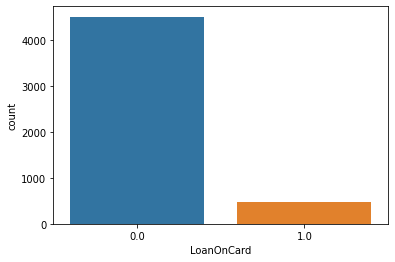

In [38]:
# distribution of the data against the target value
g = sns.countplot(x = 'LoanOnCard',  data = cust_data)


fig = g.get_figure()
fig.patch.set_alpha(1)  # make the border white so it is visible when saving as a figure
fig.savefig("../plots/plot001.png") 

### the data is highly imbalanced

In [20]:
# find the distribution of the target value
n_true = len(cust_data.loc[cust_data['LoanOnCard'] == 1.0])
n_false = len(cust_data.loc[cust_data['LoanOnCard'] == 0.0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.64%)
Number of false cases: 4500 (90.36%)


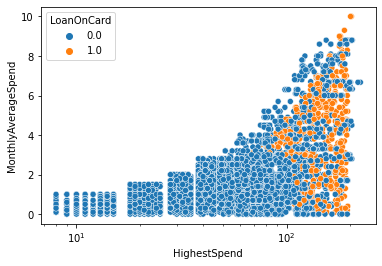

In [37]:
# Scatter plot to see how data points are distributed for "MonthlyAverageSpend" and "HighestSpend" as per target class

g = sns.scatterplot(x="HighestSpend", y="MonthlyAverageSpend", hue="LoanOnCard", data=cust_data,legend='full')
g.set(xscale="log")


fig = g.get_figure()
fig.patch.set_alpha(1)  
fig.savefig("../plots/plot002.png") 

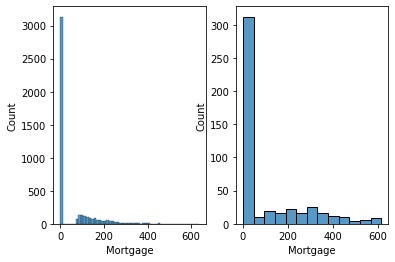

In [35]:
# look at the distribution between the target value and mortgage
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'Mortgage'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'Mortgage'], ax = ax[1])
fig.patch.set_alpha(1)   
plt.savefig("../plots/plot003.png")
plt.show()

#fig = g.get_figure()

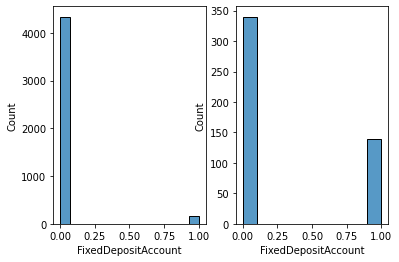

In [39]:
# look at the distribution between the target value and having a deposit account

fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'FixedDepositAccount'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'FixedDepositAccount'], ax = ax[1])
fig.patch.set_alpha(1)   
plt.savefig("../plots/plot004.png")
plt.show()

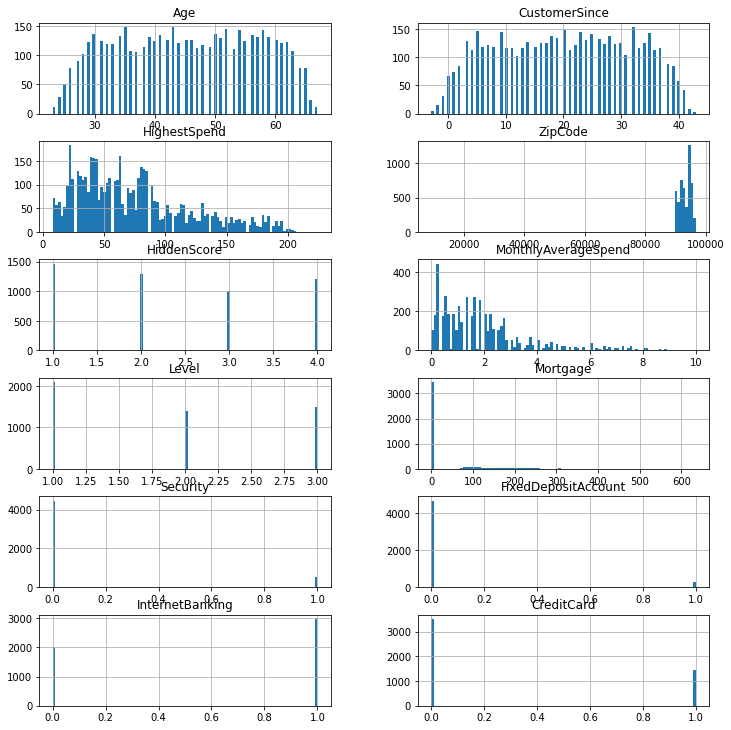

In [41]:
# histogram
columns = list(cust_data)[0:-1] # Excluding Outcome column which has only 
cust_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns


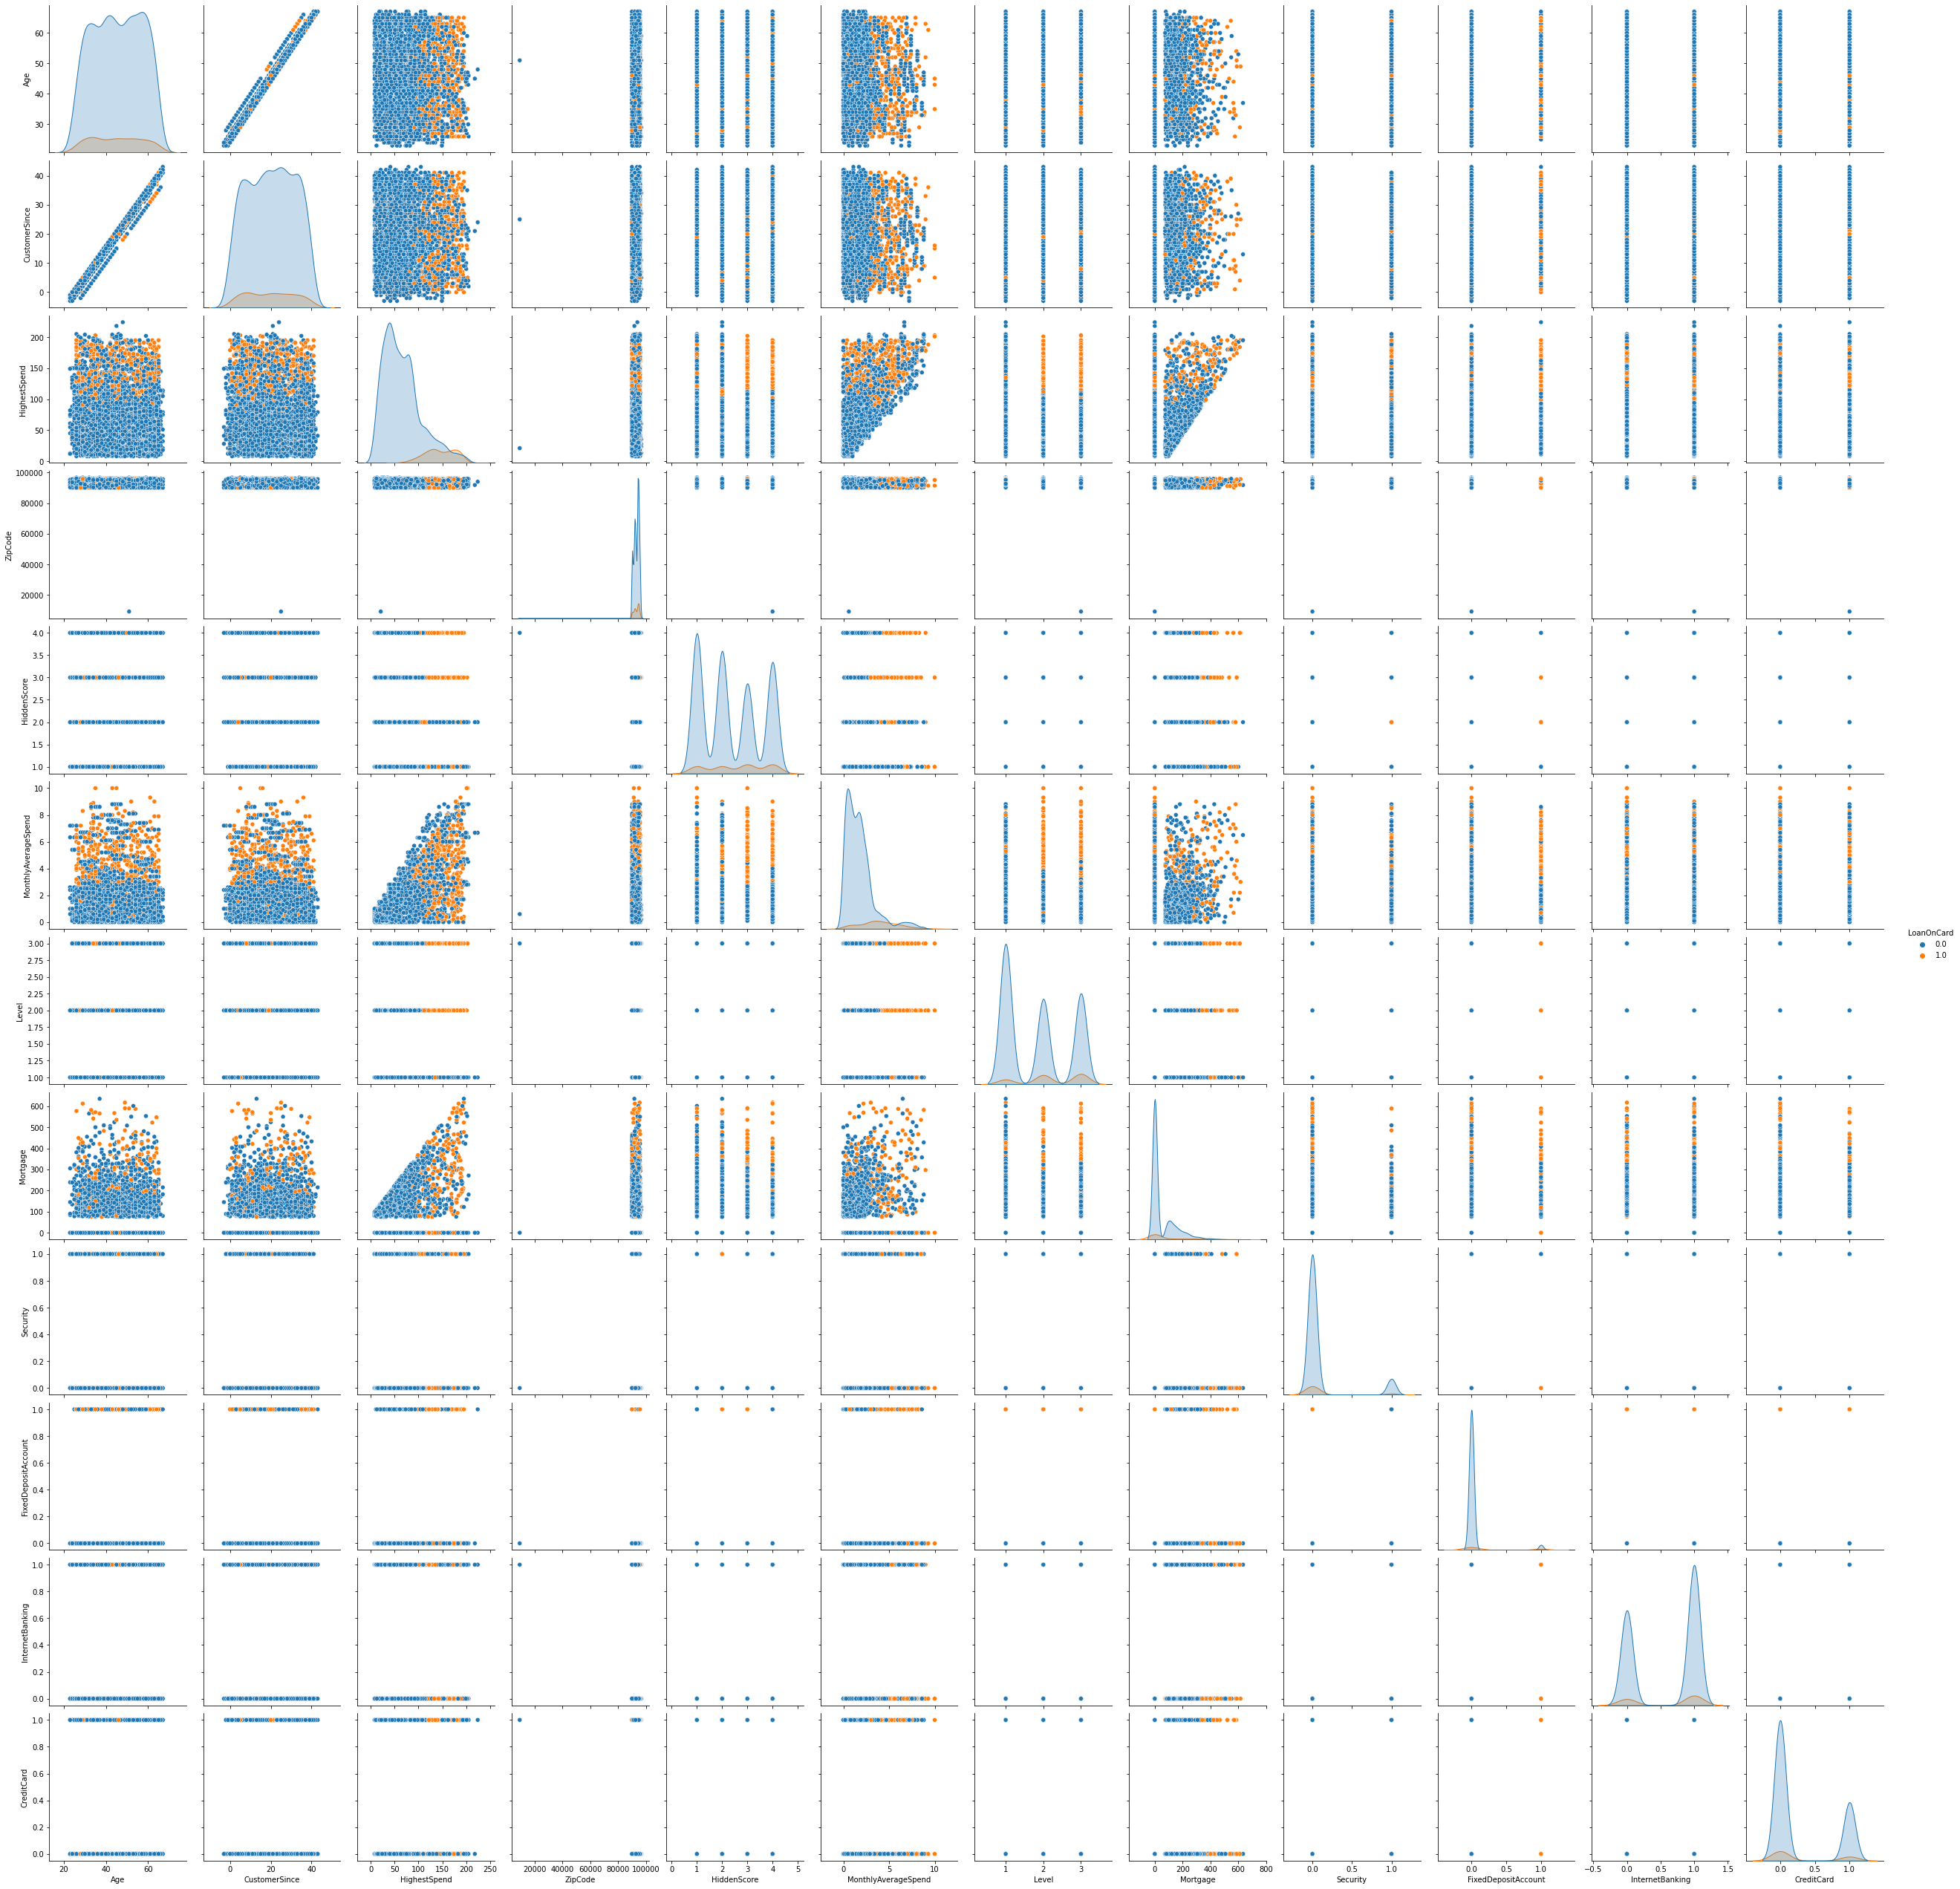

In [43]:
# pairing up the variables across axis to show any obvious correlations and look at distributions

sns.pairplot(cust_data, height=3, hue = 'LoanOnCard')
fig.patch.set_alpha(1)   
plt.savefig("../plots/plot006.png")
plt.show()

### zip code is in a narrow band and spot on each grid which indicates that it may not be a great predictor of anything in the dataset, we'll remove that information


In [44]:
# dropping zip code
cust_data = cust_data.drop(columns='ZipCode')

### age and customersince look to be highly correlated, to make sure we can look at a correllation table

In [46]:
# run a correlation analysis
corr = cust_data.corr()
corr

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994208,-0.054951,-0.045289,-0.051896,0.042750,-0.013272,0.000323,0.007744,0.011227,0.007344,-0.008147
CustomerSince,0.994208,1.000000,-0.046092,-0.051456,-0.049918,0.014545,-0.011380,-0.000469,0.010085,0.011355,0.008779,-0.007801
HighestSpend,-0.054951,-0.046092,1.000000,-0.158357,0.646109,-0.188909,0.207236,-0.002284,0.169535,0.014202,-0.002780,0.502626
HiddenScore,-0.045289,-0.051456,-0.158357,1.000000,-0.109180,0.065762,-0.021396,0.019061,0.014327,0.010900,0.010784,0.061761
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,-0.109180,1.000000,-0.137020,0.110275,0.015105,0.136410,-0.003475,-0.006577,0.366912
Level,0.042750,0.014545,-0.188909,0.065762,-0.137020,1.000000,-0.032863,-0.009443,0.013982,-0.014556,-0.011766,0.137010
Mortgage,-0.013272,-0.011380,0.207236,-0.021396,0.110275,-0.032863,1.000000,-0.005002,0.089167,-0.007044,-0.007600,0.141947
Security,0.000323,-0.000469,-0.002284,0.019061,0.015105,-0.009443,-0.005002,1.000000,0.317673,0.014007,-0.014518,0.021982
FixedDepositAccount,0.007744,0.010085,0.169535,0.014327,0.136410,0.013982,0.089167,0.317673,1.000000,0.176082,0.278924,0.316131
InternetBanking,0.011227,0.011355,0.014202,0.010900,-0.003475,-0.014556,-0.007044,0.014007,0.176082,1.000000,0.004960,0.006034


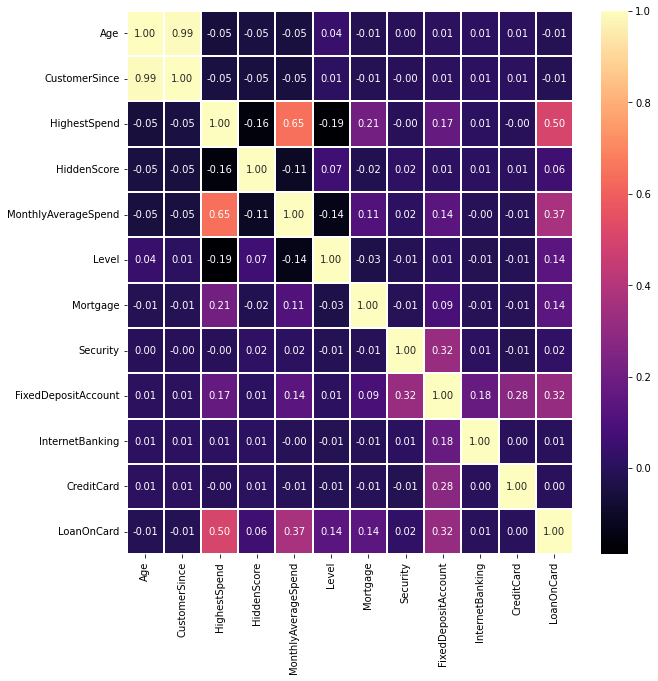

In [47]:
# also running a heatmap
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(cust_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

### since these two variables are highly correlated with each other, we can remove one of them.  

### there are no other high correlations (over 80%) which need further investitgation

In [48]:
cust_data = cust_data.drop(columns='Age')
cust_data.shape

(4980, 11)

### train - test - split

In [50]:
from sklearn.model_selection import train_test_split

X = cust_data.drop('LoanOnCard',axis=1)     # drop the target feature from the X dataset
Y = cust_data['LoanOnCard']   # Y is the target variable

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)  # using 70/30 TT  --> random_state is 43


x_train.head()

,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
2826,11,21,3,0.2,2,0,0,0,1,0
4233,7,134,2,3.3,1,0,0,0,1,0
1062,21,83,1,3.8,1,97,0,0,0,0
1520,30,120,1,7.4,1,119,0,0,1,1
4832,4,83,4,2.2,2,0,0,0,1,1


# logistic regression model

In [ ]:
# lgstic regression is used to classfiy labels for binary data
# linear regression is used to classfiy labels for a continuous variable but logistric regression is used to classfiy labels for categorical variables

# advatages:
#   fast model
#   easily extends to multiple classes (multinomial regression)

# disadvantages
#       creates linear boundries
#       assumes that the variables are independent
#       coefficient interpretation is difficult



In [51]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score  # metrics to see how the model is performing

# Fit the model on train
model = LogisticRegression(solver="liblinear")

# Large Linear Classification. 
# Uses a coordinate descent algorithm. 
# it moves toward the minimum in one direction at a time
# performs pretty well with high dimensionality


model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)  # print the coefficientss of the linear model

          0         1        2         3         4         5         6  \
0 -0.000639  0.041041  0.43959  0.123066  1.181101  0.000325 -0.693127   

          7         8         9  intercept  
0  3.307432 -0.567651 -1.016546  -9.899844  


In [52]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9544846050870147


In [53]:
# the model is 95% accurate

In [54]:
# determine whether this is a goo dmodel by using the metrics

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9544846050870147
Confusion Matrix: 
[[1338   14]
 [  54   88]]
Area Under Curve: 0.8046816401366781
Recall score: 0.6197183098591549
Precision score: 0.8627450980392157
f1 score: 0.721311475409836


In [ ]:
# the accuracy is high but in looking at the confusion matrix there are a lot of mis-classifications
# 54 were misclassified out of (88+54=142)

# Area Under Curve: 0.8046816401366781   >> 80 % correctly classified, this is a good score
# Recall score: 0.6197183098591549  >> What proportion of actual positives was identified correctly >  this is a low score due to the impbalance of data  (TP / (TP + FN))  (did the system miss any targets?)
# Precision score: 0.8627450980392157  >> What proportion of positive identifications was actually correct?   (TP / (TP + FP))  (did the system add targets that were not targets?)
# f1 score: 0.721311475409836  #combines the precision and recall of a classifier into a single metric by taking their harmonic mean

# A model will obtain a medium F1 score if one of Precision and Recall is low and the other is high

# this is a high precision but low recall system

****


## Weighted Logistic Regression to handle class inbalance

In [61]:
# find the distribution of the target value
n_true = len(cust_data.loc[cust_data['LoanOnCard'] == 1.0])
n_false = len(cust_data.loc[cust_data['LoanOnCard'] == 0.0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.64%)
Number of false cases: 4500 (90.36%)


In [62]:
# define class weights ...
# there is about a 1:9 relation ship in the data so we'll try to weight at that point

w = {0:1, 1:9}  

# Fit the model on train
model_weighted = LogisticRegression(solver="liblinear", class_weight=w)
model_weighted.fit(x_train, y_train)
#predict on test
y_predict = model_weighted.predict(x_test)



In [63]:
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.8962516733601071
Confusion Matrix: 
[[1215  137]
 [  18  124]]
Area Under Curve: 0.8859540378364864
Recall score: 0.8732394366197183
Precision score: 0.47509578544061304
f1 score: 0.6153846153846154


In [64]:
# the recall score increased at the expense of the precision and F1 scores

****

## Naive Bayes model

In [76]:
## Naive bayes

from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train)

GaussianNB()

In [77]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Naive bayes - model Accuracy on the training data: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Naive bayes - model Accuracy on the training data: 0.8876



In [78]:
y_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Naive bayes - model Accuracy on the test data: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict)))
print()

Naive bayes - model Accuracy on the test data: 0.8628



In [79]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.8627844712182061
Confusion Matrix: 
[[1213  139]
 [  66   76]]
Area Under Curve: 0.7162003083590299
Recall score: 0.5352112676056338
Precision score: 0.35348837209302325
f1 score: 0.42577030812324923


In [80]:
# due to the imbalance of the data, the NB model is not perfoming well 
#  next we will try to use class priors to work with the imbalanced data

diab_model_cp = GaussianNB(priors=[0.1, 0.9])  # give .1 and .9 to tell the model the balance of the data
#diab_model.class_prior_ = [0.9, 0.1]
diab_model_cp.fit(x_train, y_train.ravel())
y_predict = diab_model_cp.predict(x_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.8072289156626506
Confusion Matrix: 
[[1077  275]
 [  13  129]]
Area Under Curve: 0.8525241686807233
Recall score: 0.9084507042253521
Precision score: 0.3193069306930693
f1 score: 0.47252747252747257


In [ ]:
# using class priors helped the recall score byt the precision and f1 scores are pretty bad

****

SVM

****

In [81]:
from sklearn import svm
clf = svm.SVC(gamma=0.25, C=10) 
### gamma is a measure of influence of a data point. It is inverse of distance of influence. ==> in effect a high gamme means that points only near the hyperplane are considered 
#                           while a low gamma means that points further away from the hyperplane will also be considered
### C is penalty of wrong classifications ==> in effect a higher C reduces the number of support vectors and will reduce the time needed to train the model
# low gamma and low C will mean that the model will basically behave as a linear model
# high gamma and high C will mean that the model will be probably overfitted 

clf.fit(x_train , y_train)
y_predict = clf.predict(x_test)

In [82]:
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')


Accuracy Score: 0.9076305220883534
Confusion Matrix: 
[[1351    1]
 [ 137    5]]
Area Under Curve: 0.5172358113176098
Recall score: 0.035211267605633804
Precision score: 0.8333333333333334
f1 score: 0.06756756756756757


In [83]:
# the recall score is very low

In [85]:
X


,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,9,180,1,8.9,3,0,0,0,0,0
10,39,105,4,2.4,3,0,0,0,0,0
11,5,45,3,0.1,2,0,0,0,1,0
12,23,114,2,3.8,3,0,1,0,0,0
13,32,40,4,2.5,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,3,40,1,1.9,3,0,0,0,1,0
4996,4,15,4,0.4,1,85,0,0,1,0
4997,39,24,2,0.3,3,0,0,0,0,0
4998,40,49,3,0.5,2,0,0,0,1,0


In [84]:
## SVM models need their data scaled because otherwise the distances between points are exaggerated
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe()

,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
count,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03
mean,-8.493875e-17,-3.322420e-16,3.342262e-16,1.652404e-16,5.178366e-16,-1.341631e-16,-6.706594e-16,1.842123e-16,4.582234e-16,-7.633341e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.015918e+00,-1.429540e+00,-1.216634e+00,-1.108414e+00,-1.048644e+00,-5.557467e-01,-3.414556e-01,-2.540817e-01,-1.217601e+00,-6.459012e-01
25%,-8.822859e-01,-7.565844e-01,-1.216634e+00,-7.083749e-01,-1.048644e+00,-5.557467e-01,-3.414556e-01,-2.540817e-01,-1.217601e+00,-6.459012e-01
50%,-1.026117e-02,-2.138784e-01,-3.448588e-01,-2.511878e-01,1.417474e-01,-5.557467e-01,-3.414556e-01,-2.540817e-01,8.212871e-01,-6.459012e-01
75%,8.617636e-01,5.242016e-01,5.269162e-01,3.345832e-01,1.332139e+00,4.361362e-01,-3.414556e-01,-2.540817e-01,8.212871e-01,1.548224e+00
max,1.995396e+00,3.259439e+00,1.398691e+00,4.606425e+00,1.332139e+00,5.680349e+00,2.928638e+00,3.935742e+00,8.212871e-01,1.548224e+00


In [86]:
x_trains, x_tests, y_trains, y_tests = train_test_split(XScaled, Y, test_size=0.3, random_state=1)

In [101]:
clf = svm.SVC(gamma=0.25, C=10)    
clf.fit(x_trains , y_trains)
y_predicts = clf.predict(x_tests)

In [102]:
print(f'Accuracy Score: {accuracy_score(y_tests,y_predicts)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_tests, y_predicts)}')
print(f'Area Under Curve: {roc_auc_score(y_tests, y_predicts)}')
print(f'Recall score: {recall_score(y_tests,y_predicts)}')
print(f'Precision score: {precision_score(y_tests,y_predicts)}')
print(f'f1 score: {f1_score(y_tests,y_predicts)}')

Accuracy Score: 0.9745649263721553
Confusion Matrix: 
[[1332    9]
 [  29  124]]
Area Under Curve: 0.9018730534719481
Recall score: 0.8104575163398693
Precision score: 0.9323308270676691
f1 score: 0.8671328671328671


### the transformed data performed well with an F1 of .867

***


### decision tree classifier

****

In [103]:
# Build decision tree model
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)  # gini is the 'purity' of the classification

#The Gini Index varies between 0 and 1, where 0 represents purity of the classification and 1 denotes random distribution of elements among various classes. 
# A Gini Index of 0.5 shows that there is equal distribution of elements across some classes


dTree.fit(x_train, y_train)

# hyperparameters for the decision tree:
#   maximum depth (number of layers)
# minimum # of samples per leaf node
#   the min # that any leaf node may have
# maximum number of features



DecisionTreeClassifier(random_state=1)

In [104]:
# Scoring our DT
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.9805890227576974


In [ ]:
# this model is overfit at this point.  The training data has a score of 1 

In [105]:
y_predict = dTree.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9805890227576974
Confusion Matrix: 
[[1341   11]
 [  18  124]]
Area Under Curve: 0.9325516709725811
Recall score: 0.8732394366197183
Precision score: 0.9185185185185185
f1 score: 0.8953068592057762


In [106]:
#Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)  # changing the max depth
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9908204245553643
0.9825970548862115


In [107]:
# the model shows improvement

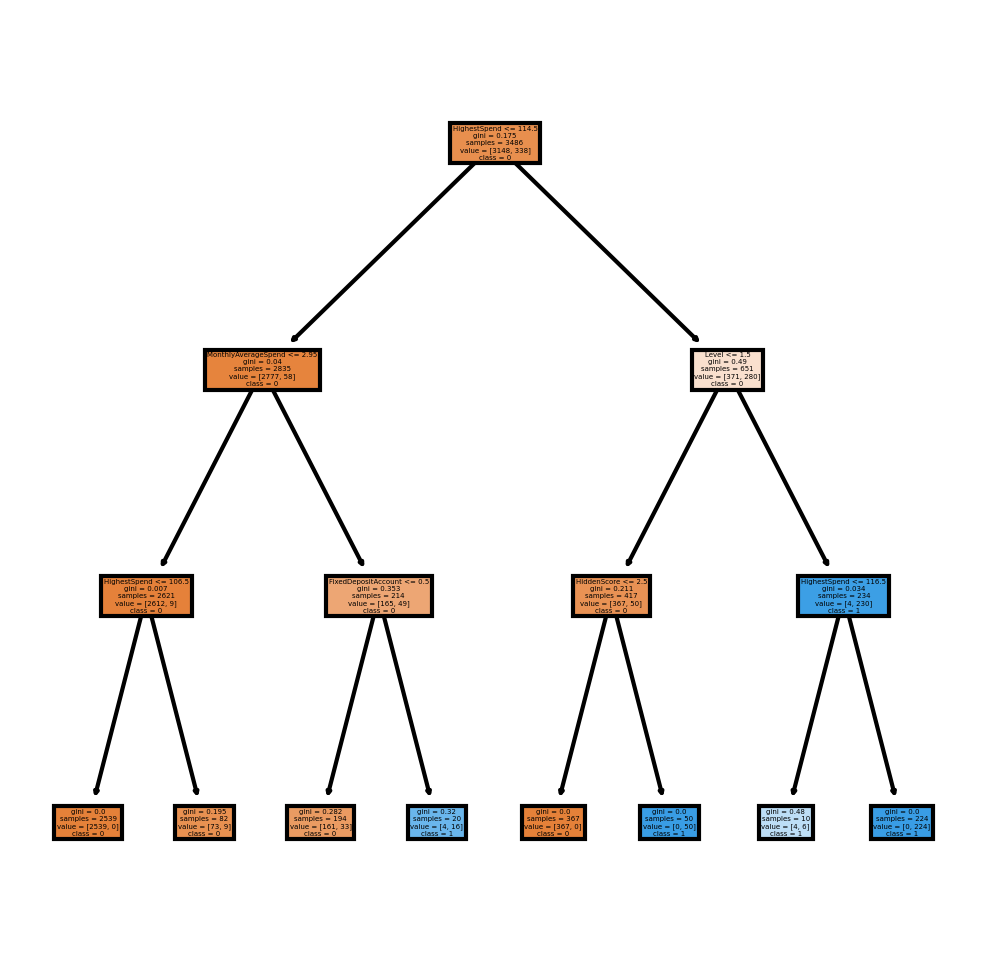

In [109]:
# Decision Tree Visualize
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
dTreeR3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR3.fit(x_train, y_train)
fn = list(x_train)
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTreeR3, feature_names = fn, class_names=cn, filled = True)

fig.savefig("../plots/plot006.png") 

****
ensemble learning: random forest classifier
****

In [110]:
from sklearn.ensemble import RandomForestClassifier
# important parameters
#  # of estimators
#  criterion
#  max # features

rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(x_train, y_train)
y_predict = rfcl.predict(x_test)

In [111]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9799196787148594
Confusion Matrix: 
[[1347    5]
 [  25  117]]
Area Under Curve: 0.9101227185598799
Recall score: 0.823943661971831
Precision score: 0.9590163934426229
f1 score: 0.8863636363636364


In [112]:
# even with the basic, default options the RFC has a good F1 score

### Unbalanced Data Handelling

In [114]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
# summarize class distribution
counter = Counter(Y)
print(counter)
# define pipeline

#OVER-SAMPLING
over = SMOTE(sampling_strategy=0.3,random_state=1) #sampling_strategy=0.1,random_state=1  >> sampling_strategy=0.3 needs to be tuned

#UNDER-SAMPLING
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [ ('o', over),('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
Xb, Yb = pipeline.fit_resample(XScaled, Y)
# summarize the new class distribution
counter = Counter(Yb)
print(counter)

Counter({0.0: 4500, 1.0: 480})
Counter({0.0: 2700, 1.0: 1350})


In [ ]:
# there are 4500 with 1 class and 480 with 0 class before using smote

# there are 2700 with 1 class and 1350 with 0 class after using smote


In [115]:
# tts the data
x_trainb, x_testb, y_trainb, y_testb = train_test_split(Xb, Yb, test_size=0.3, random_state=1)
 

## SVM with balanced Data

In [116]:
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_trainb , y_trainb)
y_predictb = clf.predict(x_testb)

In [117]:
# performance
print(f'Accuracy Score: {accuracy_score(y_testb,y_predictb)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_testb, y_predictb)}')
print(f'Area Under Curve: {roc_auc_score(y_testb, y_predictb)}')
print(f'Recall score: {recall_score(y_testb,y_predictb)}')
print(f'Precision score: {precision_score(y_testb,y_predictb)}')
print(f'f1 score: {f1_score(y_testb,y_predictb)}')

Accuracy Score: 0.980246913580247
Confusion Matrix: 
[[799  16]
 [  8 392]]
Area Under Curve: 0.9801840490797545
Recall score: 0.98
Precision score: 0.9607843137254902
f1 score: 0.9702970297029702


In [118]:
# the performance of this classifier has improved by using SMOTE
# only 8 were misclassified

## Random Forest classifier with Balanced Data

In [119]:
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(x_trainb, y_trainb)
y_predict = rfcl.predict(x_testb)

In [120]:
# performance
print(f'Accuracy Score: {accuracy_score(y_testb,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_testb, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_testb, y_predict)}')
print(f'Recall score: {recall_score(y_testb,y_predict)}')
print(f'Precision score: {precision_score(y_testb,y_predict)}')
print(f'f1 score: {f1_score(y_testb,y_predict)}')

Accuracy Score: 0.9818930041152263
Confusion Matrix: 
[[804  11]
 [ 11 389]]
Area Under Curve: 0.9795015337423314
Recall score: 0.9725
Precision score: 0.9725
f1 score: 0.9725


***
### Choosing hyperparameters using Grid Search
***

In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.25,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_trainb,y_trainb)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [122]:
# grid search found that by using C==10 and gamma==0.1 will provide the best results and those are the values used in the models above

***
pickle the model
***

In [125]:
# Pickle model file
import pickle
filename = '../model/rfc_finalized_model.sav'
pickle.dump(rfcl, open(filename, 'wb'))
filename = '../model/svm_finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

***
load the pickle model and ru
***

In [126]:
# Checking the pickle model
filename = '../model/rfc_finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_testb)
# performance
print(f'Accuracy Score: {accuracy_score(y_testb,result)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_testb, result)}')
print(f'Area Under Curve: {roc_auc_score(y_testb, result)}')
print(f'Recall score: {recall_score(y_testb,result)}')
print(f'Precision score: {precision_score(y_testb,result)}')
print(f'f1 score: {f1_score(y_testb,result)}')

Accuracy Score: 0.9818930041152263
Confusion Matrix: 
[[804  11]
 [ 11 389]]
Area Under Curve: 0.9795015337423314
Recall score: 0.9725
Precision score: 0.9725
f1 score: 0.9725


In [127]:
# Checking the pickle model
filename = '../model/svm_finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_testb)
# performance
print(f'Accuracy Score: {accuracy_score(y_testb,result)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_testb, result)}')
print(f'Area Under Curve: {roc_auc_score(y_testb, result)}')
print(f'Recall score: {recall_score(y_testb,result)}')
print(f'Precision score: {precision_score(y_testb,result)}')
print(f'f1 score: {f1_score(y_testb,result)}')

Accuracy Score: 0.980246913580247
Confusion Matrix: 
[[799  16]
 [  8 392]]
Area Under Curve: 0.9801840490797545
Recall score: 0.98
Precision score: 0.9607843137254902
f1 score: 0.9702970297029702


***
conclusion
***

### I built a model using:
    > logistic regression
    > Support vector machine 
    > Random forest classifier. 
    
These are highly imbalanced and soaccuracy can't a good measure therefore I used precision, Recall, and AUC and F score for determining better model. 

### utilized the class weight technique to handle un balanced data and observed that the model performance improved by considering class weight. 
### Scaling/data transformation plays a major role when we work on SVM. 
### I alsoo explored undersampling and oversampling technique like SMOTE to handle data imbalance.
### utilized Hyper parameter tuning using Grid Search